###  AML/Spam Filter/MDS201803

In [1]:
import numpy as np
import pandas as pd
import sklearn
import chardet

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
with open("D:\CMI\AML\SMSSpamCollection","rb") as f:
    result = chardet.detect(f.read())
print(result['encoding'])
df_raw = pd.read_csv("D:\CMI\AML\SMSSpamCollection",sep='\t',names=["v1","v2"],encoding=result['encoding'])

utf-8


### Raw Data

In [6]:
df_raw.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df=df_raw[['v1','v2']].rename(columns={'v1':'label','v2':'sms'})

### Data Frame

In [8]:
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Summary of Data Frame

In [9]:
df.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
#Drop the duplicate values
df.drop_duplicates(subset="sms",inplace=True)  

In [11]:
df.describe()

,label,sms
count,5169,5169
unique,2,5169
top,ham,am up to my eyes in philosophy
freq,4516,1


### Train Test split of data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=df['sms']

In [14]:
y=df['label']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
print("Shape of X is {}".format(X.shape))
print("Shape of X_train is {} and shape of y_train is {}".format(X_train.shape, y_train.shape))
print("Shape of X_test is {} and shape of y_test is {}".format(X_test.shape, y_test.shape))

Shape of X is (5169,)
Shape of X_train is (3876,) and shape of y_train is (3876,)
Shape of X_test is (1293,) and shape of y_test is (1293,)


In [17]:
train_data = list(X_train)

### Implementing TF-IDF vectorizer

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorizer = TfidfVectorizer(max_features=4000)
vectorizer.fit(train_data)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=4000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

### Model 1:Logistic Regression

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). For our case  its Spam and Ham.Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.


In [21]:
#Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state=1234)
pipeline = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', logistic_regression)])

### Computing cross validation score

In [28]:
#Cross Validation Score
cv_score= cross_val_score(pipeline, X_train, y_train, cv=5)
print("The vector of cross validation score for Logistic Regression is:")
print(cv_score)

The vector of cross validation score for Logistic Regression is:
[0.96005155 0.96262887 0.95870968 0.96645161 0.96124031]


In [29]:
def binary_labels(label):
    if label == 'ham':
        return 1
    else:
        return 0

Accuracy:  0.9675174013921114
Precision:  0.9663793103448276
Recall:  0.9973309608540926
F1 score:  0.9816112084063049
The precision recall curve


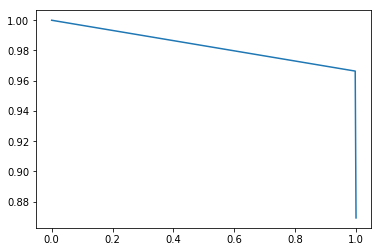

In [54]:
#Accuracy and Precision
#Note convert the labels to binary labels to use precision and recall
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import precision_recall_curve

pipeline.fit(X_train, y_train)
y_predicted = pipeline.predict(X_test)

y_binary_true = [binary_labels(label) for label in list(y_test)] 
y_binary_predict = [binary_labels(label) for label in list(y_predicted)]

accuracy = accuracy_score(y_test, y_predicted)
precision, recall, f1score,_ = precision_recall_fscore_support(y_binary_true, y_binary_predict, average='binary')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1score)

print("The precision recall curve")
precision, recall,_ = precision_recall_curve(y_binary_true, y_binary_predict)
plt.plot(recall,precision)

### Model 2:Naive Bayes

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [36]:
#Model 2: Naive Bayes
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
pipeline_bayes = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', naive_bayes)])

### Computing cross validation score

In [39]:
#Cross Validation Score
cv_score_naive_bayes = cross_val_score(pipeline_bayes, X_train, y_train, cv=5)
print("The cross validation score for Naive Bayes is:")
print(cv_score_naive_bayes)

The cross validation score for Naive Bayes is:
[0.94458763 0.95103093 0.94580645 0.95354839 0.94056848]


Accuracy:  0.9590100541376644
Precision:  0.9549702633814783
Recall:  1.0
F1 score:  0.9769665362885701
The precision recall curve


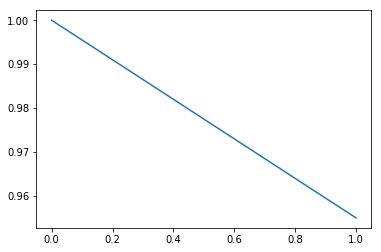

In [55]:
#Accuracy and Precision
#Note convert the labels to binary labels to use precision and recall

pipeline_bayes.fit(X_train, y_train)
y_predicted = pipeline_bayes.predict(X_test)

y_binary_true = [binary_labels(label) for label in list(y_test)] 
y_binary_predict = [binary_labels(label) for label in list(y_predicted)]

accuracy = accuracy_score(y_test, y_predicted)
precision, recall, f1score, _ = precision_recall_fscore_support(y_binary_true, y_binary_predict, average='binary')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1score)

print("The precision recall curve")
precision, recall, _ = precision_recall_curve(y_binary_true, y_binary_predict)
plt.plot(recall,precision)

### Model 3:Decision Tree

Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

In [44]:
#Model 3: Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
pipeline_decision_tree = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', decision_tree)])

### Computing cross validation score

In [45]:
#Cross Validation Score
cv_score_decision_tree = cross_val_score(pipeline_decision_tree, X_train, y_train, cv=5)
print("The cross validation score for Decison Tree is:")
print(cv_score_decision_tree)

The cross validation score for Decison Tree is:
[0.95103093 0.96262887 0.96645161 0.95612903 0.95478036]


Accuracy:  0.9474091260634184
Precision:  0.9656084656084656
Recall:  0.9741992882562278
F1 score:  0.9698848538529672
The precision recall curve


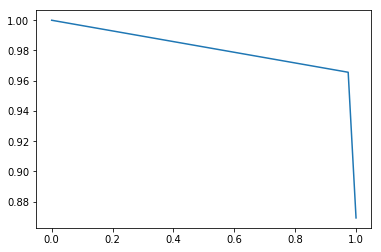

In [56]:
#Accuracy and Precision
#Note convert the labels to binary labels to use precision and recall

pipeline_decision_tree.fit(X_train, y_train)
y_predicted = pipeline_decision_tree.predict(X_test)

y_binary_true = [binary_labels(label) for label in list(y_test)] 
y_binary_predict = [binary_labels(label) for label in list(y_predicted)]

accuracy = accuracy_score(y_test, y_predicted)
precision, recall, f1score, _ = precision_recall_fscore_support(y_binary_true, y_binary_predict, average='binary')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1score)

print("The precision recall curve")
precision, recall, _ = precision_recall_curve(y_binary_true, y_binary_predict)
plt.plot(recall,precision)

### Model 4:Random Forest

Random forests, also known as random decision forests, are a popular ensemble method that can be used to build predictive models for both classification and regression problems. Ensemble methods use multiple learning models to gain better predictive results — in the case of a random forest, the model creates an entire forest of random uncorrelated decision trees to arrive at the best possible answer. 

In [48]:
#Model 4:Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
pipeline_forest = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', random_forest)])

### Computing cross validation score

In [49]:
#Cross Validation Score
cv_score_random_forest = cross_val_score(pipeline_forest, X_train, y_train, cv=5)
print("The cross validation score for Random Forest is:")
print(cv_score_random_forest)

The cross validation score for Random Forest is:
[0.97164948 0.96262887 0.96774194 0.96516129 0.96640827]


Accuracy:  0.9651972157772621
Precision:  0.9638865004299226
Recall:  0.9973309608540926
F1 score:  0.9803235679930039
The precision recall curve is:


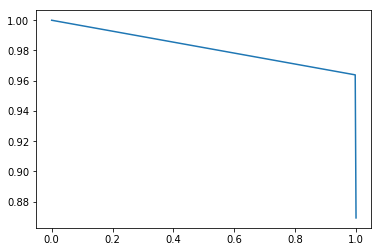

In [57]:
#Accuracy and Precision
#Note convert the labels to binary labels to use precision and recall

pipeline_forest.fit(X_train, y_train)
y_predicted = pipeline_forest.predict(X_test)

y_binary_true = [binary_labels(label) for label in list(y_test)] 
y_binary_predict = [binary_labels(label) for label in list(y_predicted)]

accuracy = accuracy_score(y_test, y_predicted)
precision, recall, f1score, _ = precision_recall_fscore_support(y_binary_true, y_binary_predict, average='binary')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1score)

print("The precision recall curve is:")
precision, recall, _ = precision_recall_curve(y_binary_true, y_binary_predict)
plt.plot(recall,precision)